In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [14]:
Xs = np.append(np.append(uniform.rvs(loc=0, scale=20, size=30),uniform.rvs(loc=30, scale=20, size=20)), np.append(uniform.rvs(loc=0, scale=20, size=25), uniform.rvs(loc=30, scale=20, size=25)))
Ys = np.append(np.append(uniform.rvs(loc=0, scale=20, size=30),uniform.rvs(loc=30, scale=20, size=20)), np.append(uniform.rvs(loc=0, scale=20, size=25), uniform.rvs(loc=0, scale=20, size=25)))
#Xs = uniform.rvs(loc=0, scale=50, size=100)
#Ys = uniform.rvs(loc=0, scale=50, size=100)

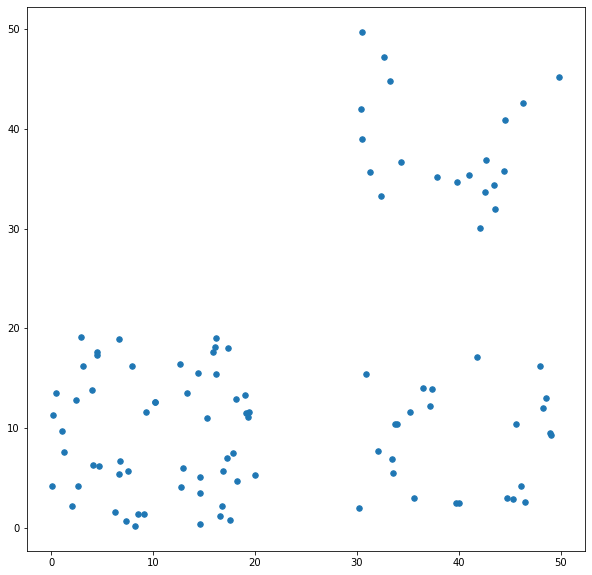

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys, s = 30)

In [16]:
data = np.transpose(np.asarray([Xs, Ys]))

In [17]:
clustering = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(data)

In [18]:
A = clustering.labels_

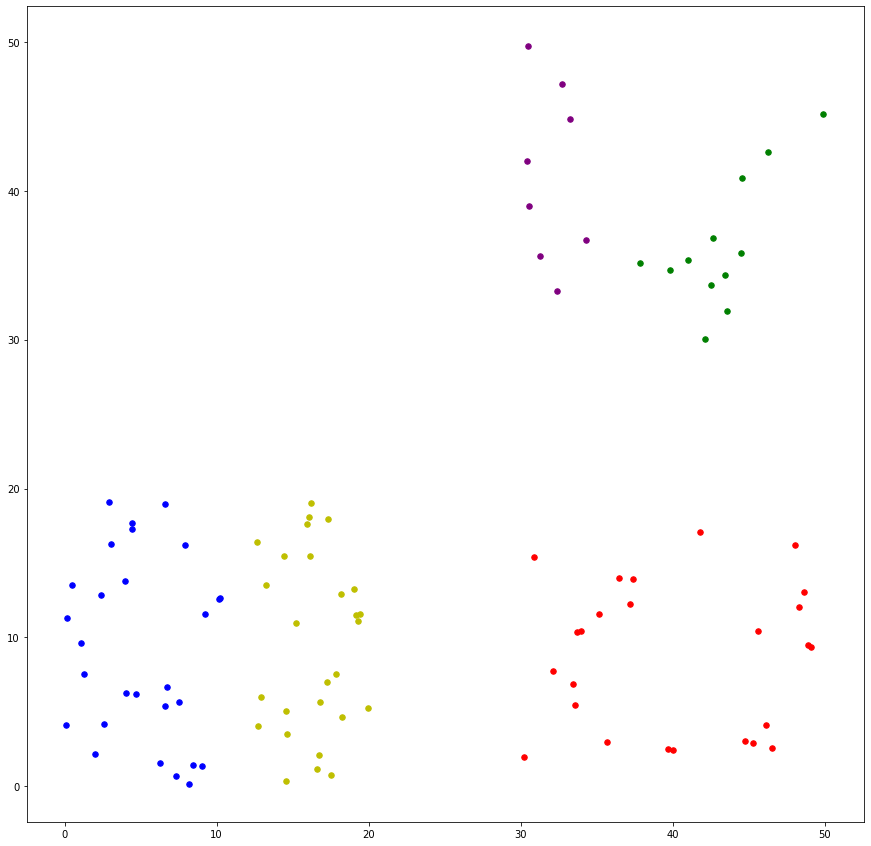

In [19]:
X0 = [Xs[i] for i in range(100) if A[i] == 0] 
X1 = [Xs[i] for i in range(100) if A[i] == 1] 
X2 = [Xs[i] for i in range(100) if A[i] == 2] 
X3 = [Xs[i] for i in range(100) if A[i] == 3] 
X4 = [Xs[i] for i in range(100) if A[i] == 4] 
Y0 = [Ys[i] for i in range(100) if A[i] == 0] 
Y1 = [Ys[i] for i in range(100) if A[i] == 1] 
Y2 = [Ys[i] for i in range(100) if A[i] == 2] 
Y3 = [Ys[i] for i in range(100) if A[i] == 3] 
Y4 = [Ys[i] for i in range(100) if A[i] == 4] 
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'purple')

In [20]:
T= 0.05 / (1 - 0.05 * 1)

In [21]:
import random
random.seed(10)
heads = []
for i in range(100):
    if random.uniform (0,1) <= T: 
        heads.append([Xs[i], Ys[i]])
heads = np.array(heads)
heads[0][1], heads

(0.7727043335372996,
 array([[17.5130354 ,  0.77270433],
        [16.13632902, 15.44462347],
        [ 7.52684358,  5.68274362],
        [49.88300717, 45.15595755],
        [19.14542015, 11.52072973]]))

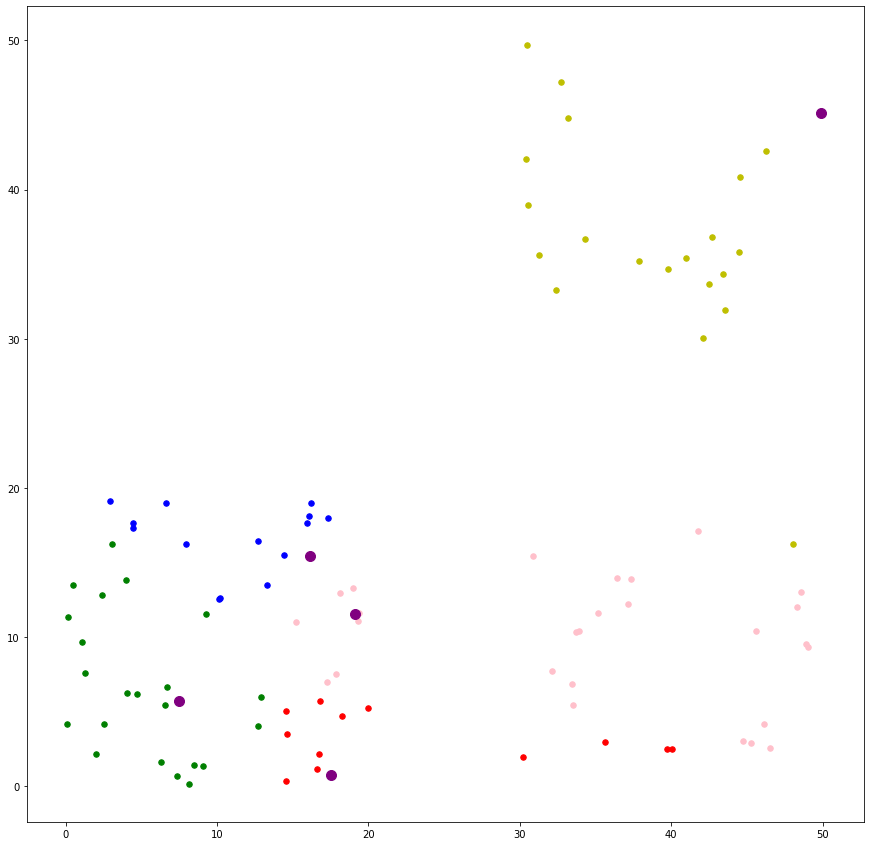

In [22]:
X0 = []
Y0 = []
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
X4 = []
Y4 = []

def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

def choose(x_1, y_1):
    dis0 = distance(x_1, heads[0][0], y_1, heads[0][1])
    dis1 = distance(x_1, heads[1][0], y_1, heads[1][1])
    dis2 = distance(x_1, heads[2][0], y_1, heads[2][1])
    dis3 = distance(x_1, heads[3][0], y_1, heads[3][1])
    dis4 = distance(x_1, heads[4][0], y_1, heads[4][1])
    dis = np.min(np.asarray([dis0, dis1, dis2, dis3, dis4]))
    if dis0 == dis:
        X0.append(x_1)
        Y0.append(y_1)
    if dis1 == dis:
        X1.append(x_1)
        Y1.append(y_1)
    if dis2 == dis:
        X2.append(x_1)
        Y2.append(y_1)
    if dis3 == dis:
        X3.append(x_1)
        Y3.append(y_1)
    if dis4 == dis:
        X4.append(x_1)
        Y4.append(y_1)
        
for i in range(100):
    choose(Xs[i], Ys[i])
    
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')  
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'pink')  
plt.scatter(heads[:, 0], heads[:, 1], s = 100, color = 'purple')

In [13]:
A = []
bitmap = [1 for i in range(100)]
while True:
    if len([k for k in range(100) if bitmap[k] == 1]) == 0:
        break
    j = [k for k in range(100) if bitmap[k] == 1][0]
    B = []
    while True:
        B.append(j)
        bitmap[j] = 0
        if bitmap[dis_vec[j][0]] == 1:
            j = dis_vec[j][0]
        else:
            A.append(B)
            break
#print(A)
for B in A:
    for a in B:
        for b in B:
            if b in dis_vec[a]:
                dis_vec[a].remove(b)
temp = []
bitmap = [1 for i in range(len(A))]
for i in range(len(A)):
    for j in range(i + 1, len(A)):
        #print(A[i], A[j], dis_vec[A[i][len(A[i]) - 1]][0])
        if bitmap[i] != 0 and bitmap[j] != 0 and dis_vec[A[i][len(A[i]) - 1]][0] in A[j]:
            temp.append(np.append(A[i], A[j]).tolist())
            bitmap[i] = 0
            bitmap[j] = 0
A = temp
print(A)

# for B in A:
#     for a in B:
#         for b in B:
#             if b in dis_vec[a]:
#                 dis_vec[a].remove(b)
# temp = []
# bitmap = [1 for i in range(len(A))]
# for i in range(len(A)):
#     for j in range(i + 1, len(A)):
#         #print(A[i], A[j], dis_vec[A[i][len(A[i]) - 1]][0])
#         if bitmap[i] != 0 and bitmap[j] != 0 and dis_vec[A[i][0]][0] in A[j]:
#             temp.append(np.append(A[i], A[j]).tolist())
#             bitmap[i] = 0
#             bitmap[j] = 0
#             break
# A = temp
# print(A)

[[0, 10, 1, 7, 13, 19], [2, 9, 24], [4, 5, 15], [8, 17, 25, 68, 32], [12, 20, 18], [26, 28, 43, 51, 27, 52, 46], [29, 53, 58], [31, 69, 73, 45, 61, 63], [33, 37, 66, 42], [41, 67, 59], [44, 50, 55], [48, 54, 60], [75, 78, 97], [76, 99, 96], [77, 87, 84, 85], [79, 90, 80, 93], [81, 86, 82, 92], [83, 94, 88]]


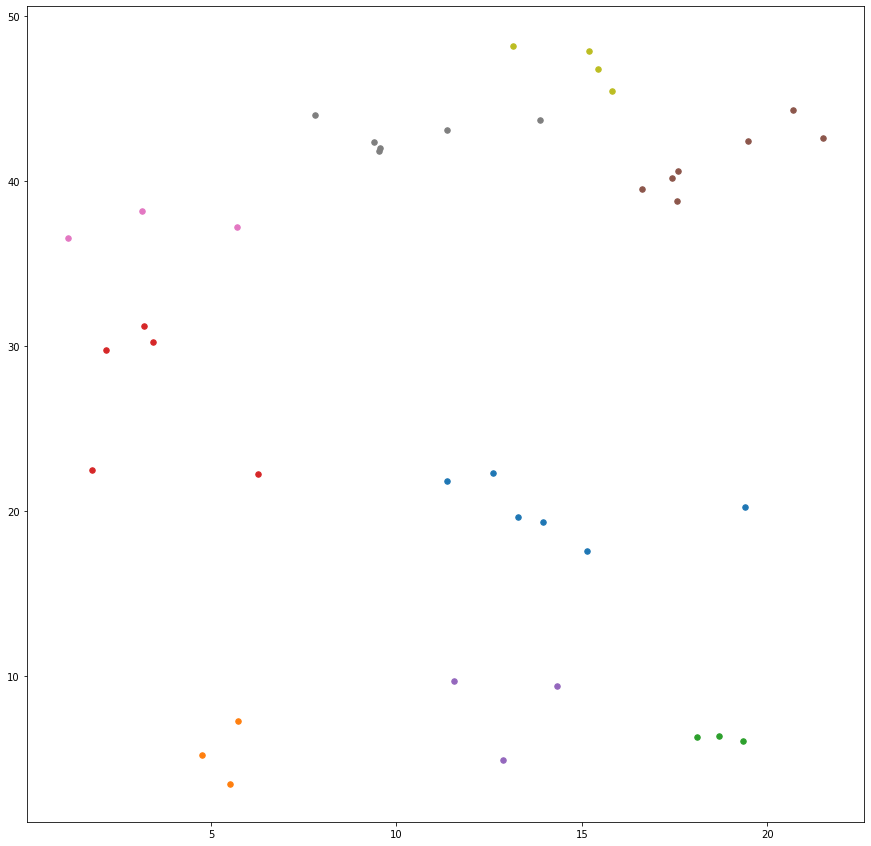

In [14]:
X0 = [Xs[i] for i in A[0]]
Y0 = [Ys[i] for i in A[0]]
X1 = [Xs[i] for i in A[1]]
Y1 = [Ys[i] for i in A[1]]
X2 = [Xs[i] for i in A[2]]
Y2 = [Ys[i] for i in A[2]]
X3 = [Xs[i] for i in A[3]]
Y3 = [Ys[i] for i in A[3]]
X4 = [Xs[i] for i in A[4]]
Y4 = [Ys[i] for i in A[4]]
X5 = [Xs[i] for i in A[5]]
Y5 = [Ys[i] for i in A[5]]
X6 = [Xs[i] for i in A[6]]
Y6 = [Ys[i] for i in A[6]]
X7 = [Xs[i] for i in A[7]]
Y7 = [Ys[i] for i in A[7]]
X8 = [Xs[i] for i in A[8]]
Y8 = [Ys[i] for i in A[8]]
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30)
plt.scatter(X1, Y1, s = 30)
plt.scatter(X2, Y2, s = 30)  
plt.scatter(X3, Y3, s = 30)
plt.scatter(X4, Y4, s = 30) 
plt.scatter(X5, Y5, s = 30)
plt.scatter(X6, Y6, s = 30)  
plt.scatter(X7, Y7, s = 30)
plt.scatter(X8, Y8, s = 30) 
#plt.scatter(Xs, Ys, s = 30, color = 'black')

In [15]:
bitmap = [i for i in range(100)]
for k in range(3):
    for i in range(100):
        if dis_vec[i][k] > i and bitmap[dis_vec[i][k]] != bitmap[i]:
            for p in range(100):
                x = bitmap[dis_vec[i][k]]
                y = bitmap[i]
                if bitmap[p] == x:
                    bitmap[p] = y
S = set()
for p in bitmap:
    if p not in S:
        S.add(p)
print(S)
#print(bitmap)
# for i in range(50):
#     if dis_vec[i][3] > i and bitmap[dis_vec[i][3]] != bitmap[i]:
#         for p in range(100):
#             x = bitmap[dis_vec[i][3]]
#             y = bitmap[i]
#             if bitmap[p] == x:
#                 bitmap[p] = y
# S = set()
# for p in bitmap:
#     if p not in S:
#         S.add(p)
# print(S)
print(bitmap)

{64, 34, 98, 5, 41, 46, 53, 89, 90, 30, 31}
[53, 53, 5, 5, 5, 5, 5, 53, 53, 5, 53, 5, 5, 53, 53, 5, 5, 53, 5, 53, 5, 53, 5, 5, 5, 53, 30, 46, 30, 53, 30, 53, 53, 46, 30, 53, 30, 46, 53, 53, 46, 53, 46, 30, 53, 53, 46, 46, 53, 53, 53, 46, 46, 53, 53, 53, 53, 53, 53, 53, 41, 46, 53, 53, 64, 53, 46, 41, 53, 31, 34, 53, 46, 53, 46, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 90, 90, 90, 90, 90, 98, 90]


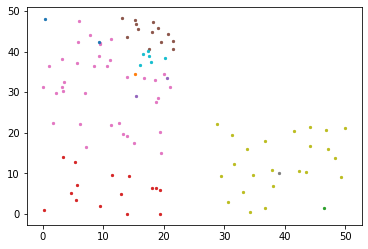

In [16]:
for s in S:
    plt.scatter(Xs[[i for i in range(100) if bitmap[i] == s]], Ys[[i for i in range(100) if bitmap[i] == s]], s = 5)

In [17]:
dis_vec = []
for i in range(100):
    li = []
    for j in range(100):
        dis = distance(Xs[i], Xs[j], Ys[i], Ys[j])
        li.append([dis, j])
    #li.sort(key=lambda x: x[0])
    #li = li[1:]
    dis_vec.append(np.asarray(li))
dis_vec = np.asarray(dis_vec)
dis_vec.shape

(100, 100, 2)

In [18]:
clusters = [[i] for i in range(100)]
def cluster_dis(i, j):
    list = [np.mean(dis_vec[k, clusters[j], 0]) for k in clusters[i]]
    return np.mean(list)

while len(clusters) > 5:
    min = float('inf')
    temp_i = -1
    temp_j = -1
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if cluster_dis(i, j) < min:
                min = cluster_dis(i, j)
                temp_i = i
                temp_j = j
    new_clusters = []
    new_clusters.append(np.append(clusters[temp_i], clusters[temp_j]).tolist())
    for i in range(len(clusters)):
        if i != temp_i and i != temp_j:
            new_clusters.append(clusters[i])
    clusters = new_clusters

25 7
11 4
13 1
39 25
12 7


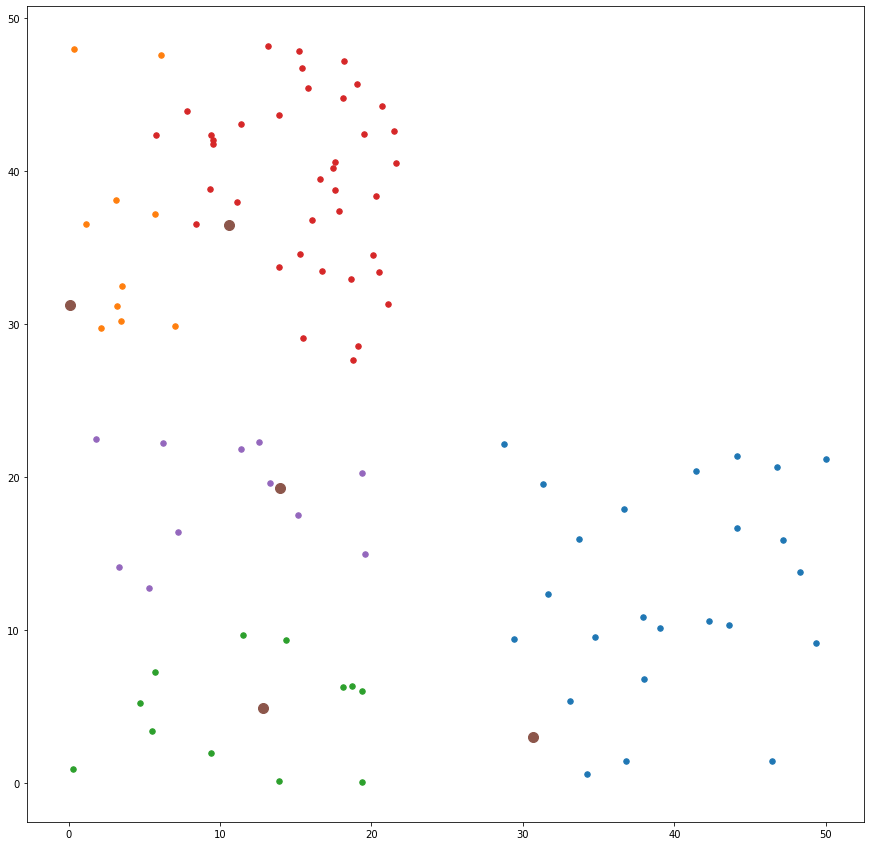

In [19]:
A = clusters
X0 = [Xs[i] for i in A[0]]
Y0 = [Ys[i] for i in A[0]]
X1 = [Xs[i] for i in A[1]]
Y1 = [Ys[i] for i in A[1]]
X2 = [Xs[i] for i in A[2]]
Y2 = [Ys[i] for i in A[2]]
X3 = [Xs[i] for i in A[3]]
Y3 = [Ys[i] for i in A[3]]
X4 = [Xs[i] for i in A[4]]
Y4 = [Ys[i] for i in A[4]]
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30)
plt.scatter(X1, Y1, s = 30)
plt.scatter(X2, Y2, s = 30)  
plt.scatter(X3, Y3, s = 30)
plt.scatter(X4, Y4, s = 30) 
random.seed(4)
a = random.randint(0, len(A[0]) - 1)
b = random.randint(0, len(A[1]) - 1)
c = random.randint(0, len(A[2]) - 1)
d = random.randint(0, len(A[3]) - 1)
e = random.randint(0, len(A[4]) - 1)
print(len(A[0]), a)
print(len(A[1]), b)
print(len(A[2]), c)
print(len(A[3]), d)
print(len(A[4]), e)
plt.scatter([X0[a], X1[b], X2[c], X3[d], X4[e]], [Y0[a], Y1[b], Y2[c], Y3[d], Y4[e]], s = 100)

In [128]:
order = uniform.rvs(loc=0, scale=100, size=100)

In [20]:
clusters

[[82,
  92,
  89,
  88,
  81,
  86,
  84,
  85,
  77,
  87,
  91,
  98,
  79,
  90,
  80,
  93,
  83,
  94,
  76,
  99,
  95,
  96,
  75,
  78,
  97],
 [32, 68, 25, 62, 56, 38, 29, 53, 58, 64, 71],
 [6, 18, 23, 12, 20, 4, 5, 15, 3, 2, 9, 24, 11],
 [46,
  52,
  27,
  47,
  72,
  40,
  37,
  66,
  42,
  33,
  61,
  34,
  36,
  26,
  28,
  43,
  51,
  30,
  74,
  31,
  35,
  45,
  73,
  69,
  63,
  44,
  50,
  55,
  65,
  41,
  67,
  49,
  39,
  59,
  57,
  70,
  48,
  54,
  60],
 [8, 17, 16, 22, 14, 1, 21, 13, 19, 7, 0, 10]]